# Class 2025 MBA Admission Prediction

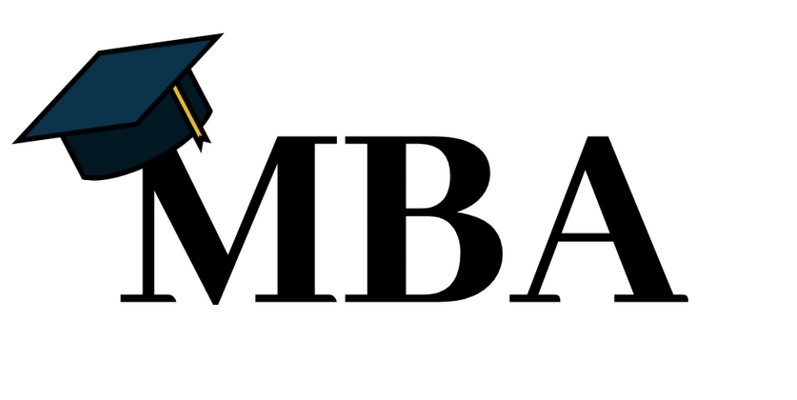

## Meta Data:
- application_id: Unique identifier for each application
- gender: Applicant's gender (Male, Female)
- international: International student (TRUE/FALSE)
- gpa: Grade Point Average of the applicant (on 4.0 scale)
- major: Undergraduate major (Business, STEM, Humanities)
- race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
- gmat: GMAT score of the applicant (800 points)
- work_exp: Number of years of work experience (Year)
- work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
- admission: Admission status (Admit, Waitlist, Null: Deny).

## Usage:
- Exploratory Data Analysis (EDA): Understand the distributions, relationships, and patterns within the data.
- Classification: Predict the admission status based on other features.

### Step 1: Data Loading and Understanding

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('MBA.csv')
# Display the top 5 records of the dataset
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


(6194, 10)
The dataset has 6194 rows and 10 columns
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
None
------------------------------------------------------------------------------------------


,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


------------------------------------------------------------------------------------------
The dataset has 0 duplicates
------------------------------------------------------------------------------------------


,gender,major,race,work_industry,admission
count,6194,6194,4352,6194,1000
unique,2,3,5,14,2
top,Male,Humanities,White,Consulting,Admit
freq,3943,2481,1456,1619,900


------------------------------------------------------------------------------------------
application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


<AxesSubplot:>

------------------------------------------------------------------------------------------


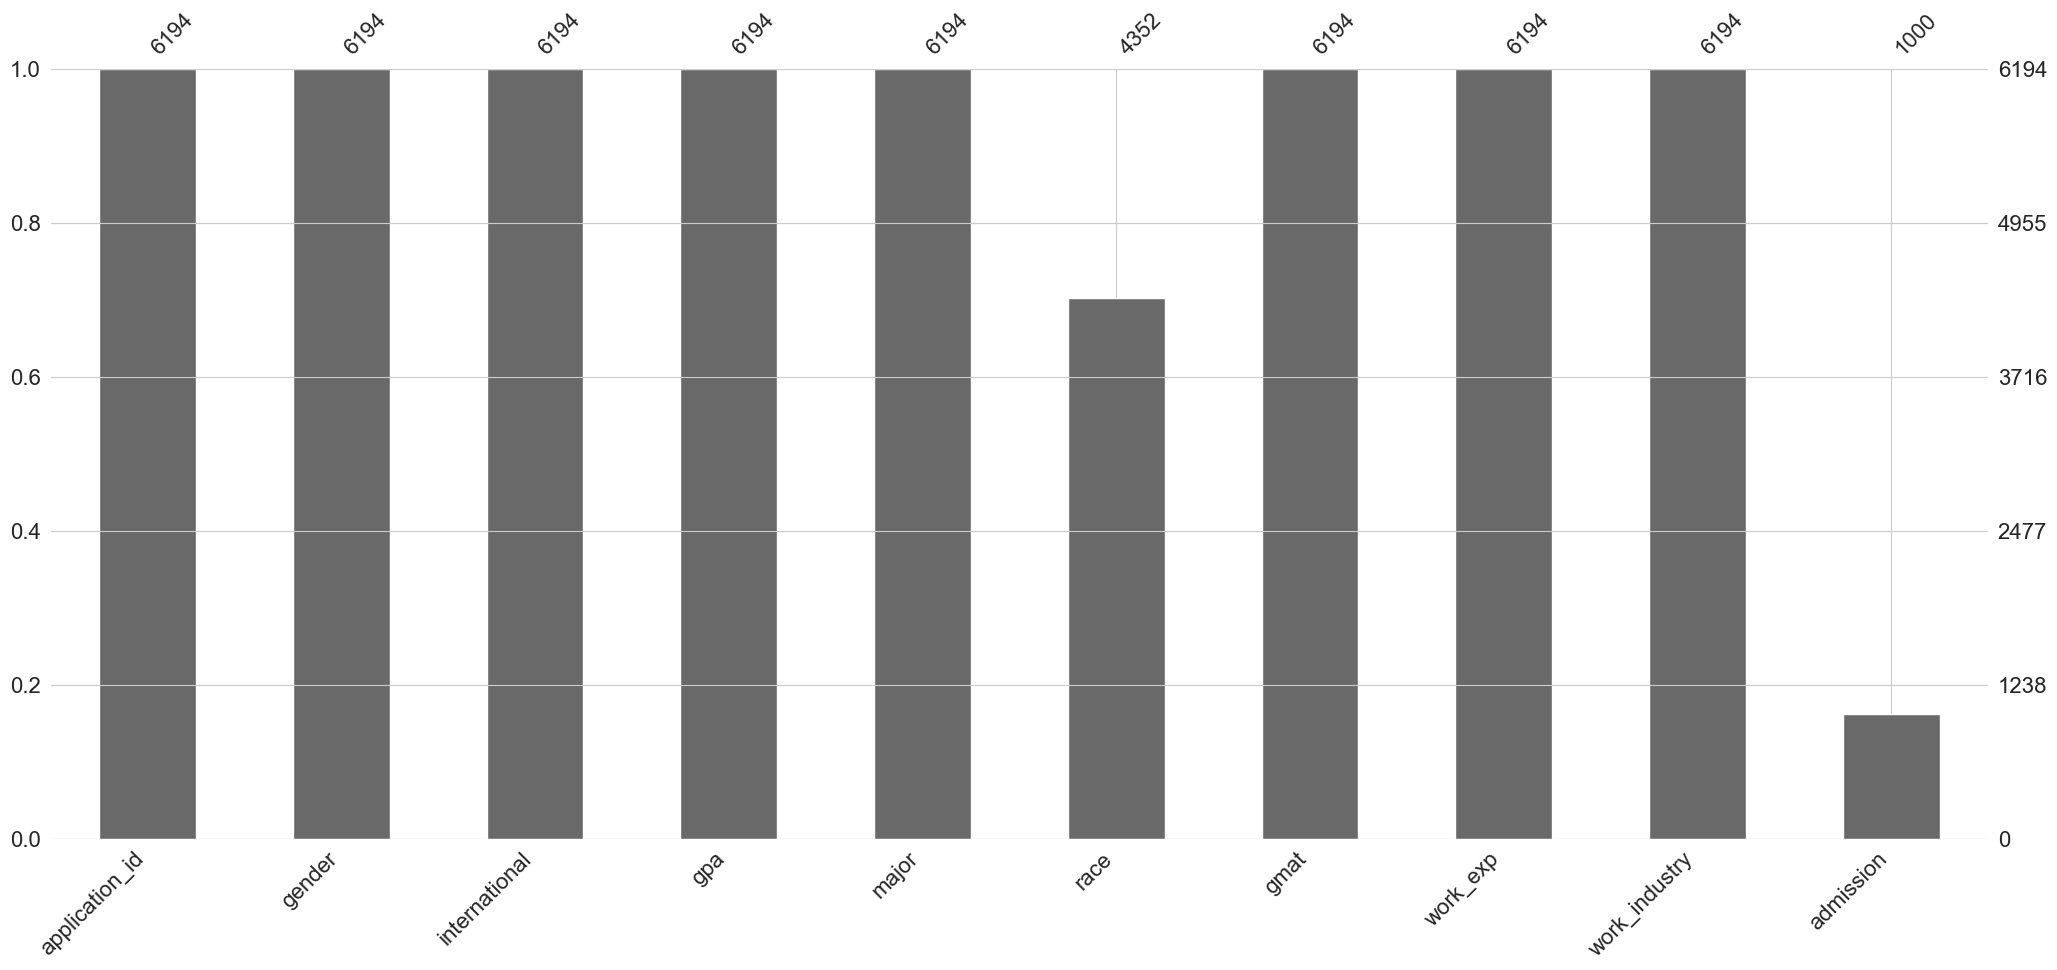

In [4]:
# Displaying the shape of the dataset
print(df.shape)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print('---'*30)

# Displaying the datatype of each column
print(df.info())
print('---'*30)

# Checking for the numerical summary of the dataset
display(df.describe())
print('---'*30)

# Checking for duplicates
df.duplicated().sum()
print(f'The dataset has {df.duplicated().sum()} duplicates')
print('---'*30)

# Checking for the categorical summary of the dataset
display(df.describe(include='object'))
print('---'*30)

# Checking for missing values
print(df.isnull().sum())
import missingno as msno
plt.figure(figsize=(12,4))
display(msno.bar(df))
print('---'*30)


### Step 2: Data Wrangling/Cleaning

In [5]:
# Updating the race missing values
df['race'].fillna('International', inplace = True)

# Updating the admission missing values
df['admission'].fillna('Deny', inplace = True)

# Checking for missing values again

print(df.isnull().sum())


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


In [6]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


In [7]:
for i in df.select_dtypes(include='object').columns:
    print(f'{i.upper()}: {df[i].unique()}')


GENDER: ['Female' 'Male']
MAJOR: ['Business' 'Humanities' 'STEM']
RACE: ['Asian' 'Black' 'International' 'Hispanic' 'White' 'Other']
WORK_INDUSTRY: ['Financial Services' 'Investment Management' 'Technology' 'Consulting'
 'Nonprofit/Gov' 'PE/VC' 'Health Care' 'Investment Banking' 'Other'
 'Retail' 'Energy' 'CPG' 'Real Estate' 'Media/Entertainment']
ADMISSION: ['Admit' 'Deny' 'Waitlist']


In [8]:
# Changing the 'other' in race to international
df['race'].replace('Other', 'International', inplace = True)

### Step 3: Exploratory Data Analysis

In [9]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


### Distribution Analysis

count    6194.000000
mean        3.250714
std         0.151541
min         2.650000
25%         3.150000
50%         3.250000
75%         3.350000
max         3.770000
Name: gpa, dtype: float64

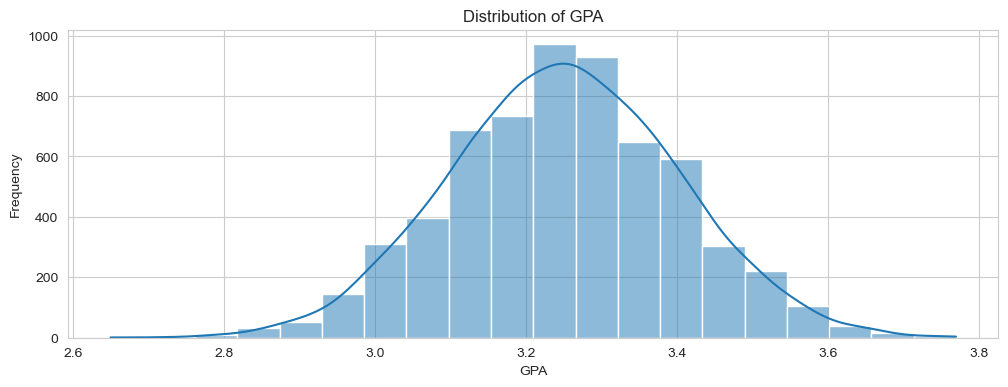

In [10]:
# GPA
display(df['gpa'].describe())
plt.figure(figsize=(12,4))

sns.histplot(df['gpa'], kde=True, bins=20)

plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')

plt.show()

count    6194.000000
mean      651.092993
std        49.294883
min       570.000000
25%       610.000000
50%       650.000000
75%       680.000000
max       780.000000
Name: gmat, dtype: float64

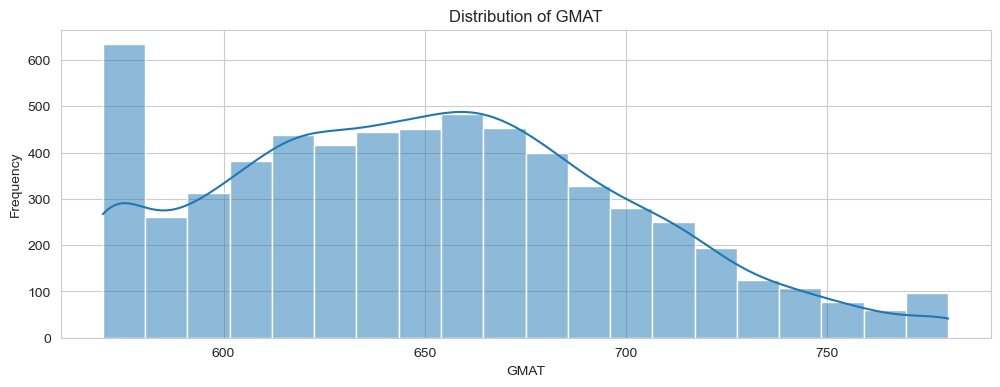

In [11]:
# GMAT
display(df['gmat'].describe())
plt.figure(figsize=(12,4))

sns.histplot(df['gmat'], kde=True, bins=20)

plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.title('Distribution of GMAT')

plt.show()

count    6194.000000
mean        5.016952
std         1.032432
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: work_exp, dtype: float64

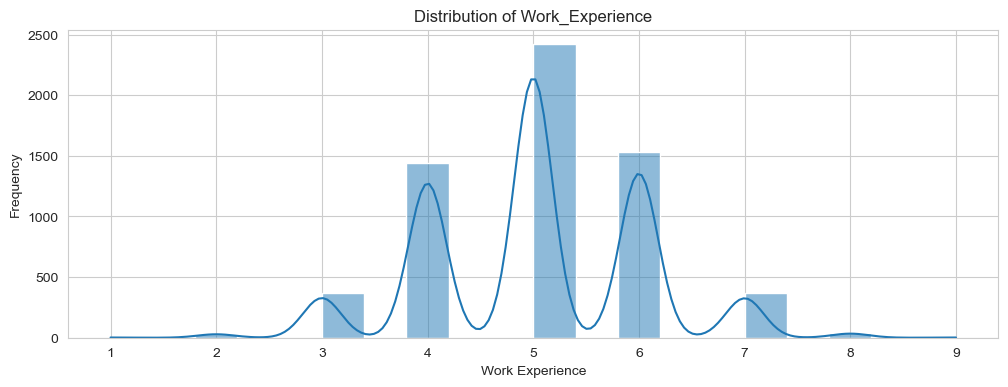

In [12]:
# Work Experirnce
display(df['work_exp'].describe())
plt.figure(figsize=(12,4))

sns.histplot(df['work_exp'], kde=True, bins=20)

plt.xlabel('Work Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Work_Experience')

plt.show()

### Relationship Analysis

##### 
- Correlation between GMAT and GPA

0.5775391334190765


Text(0.5, 1.0, 'Scatter Plot of GPA vs GMAT')

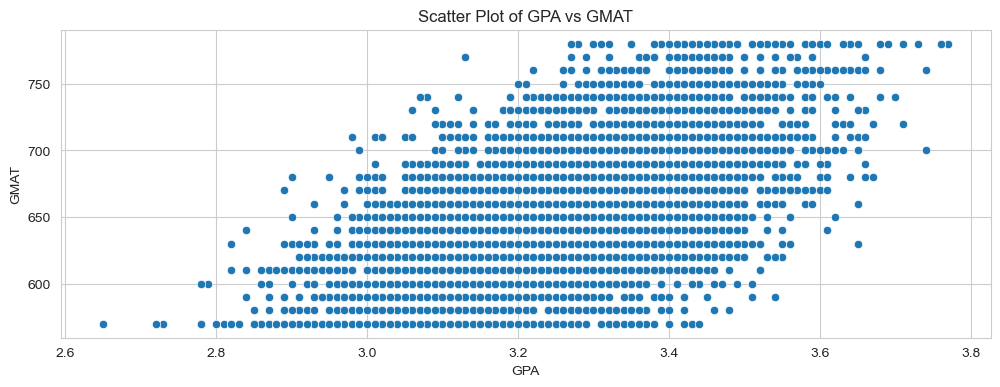

In [13]:
# Calculating the correlation coefficient

corr_coef = df['gpa'].corr(df['gmat'])
print(corr_coef)

plt.figure(figsize=(12,4))
sns.scatterplot(x=df['gpa'], y=df['gmat'])

plt.xlabel('GPA')

plt.ylabel('GMAT')

plt.title('Scatter Plot of GPA vs GMAT')

#### 
- Correlation between GMAT and WORK_EXPERIENCE

-0.0009986676076254117


Text(0.5, 1.0, 'Scatter Plot of Work Experience vs GMAT')

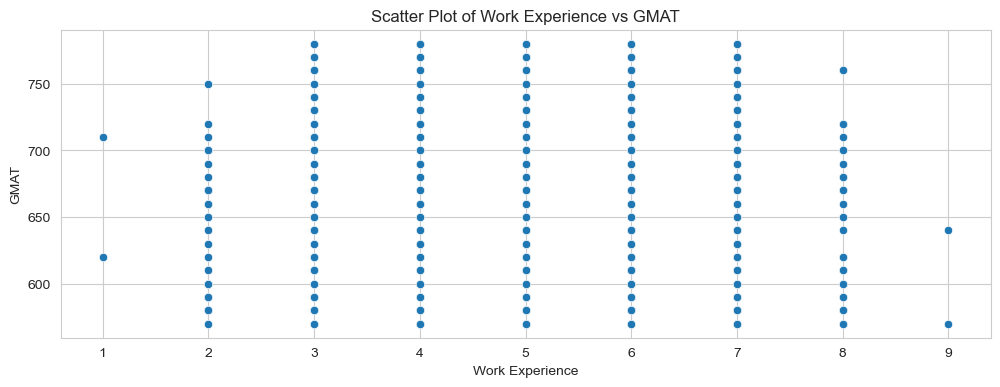

In [14]:
# Calculating the correlation coefficient
corr_coef = df['work_exp'].corr(df['gmat'])
print(corr_coef)

plt.figure(figsize=(12,4))
sns.scatterplot(x=df['work_exp'], y=df['gmat'])

plt.xlabel('Work Experience')

plt.ylabel('GMAT')

plt.title('Scatter Plot of Work Experience vs GMAT')

####
- Correlation of GPA vs Work Experience

0.0003458166174786352


Text(0.5, 1.0, 'Scatter Plot of Work Experience vs GPA')

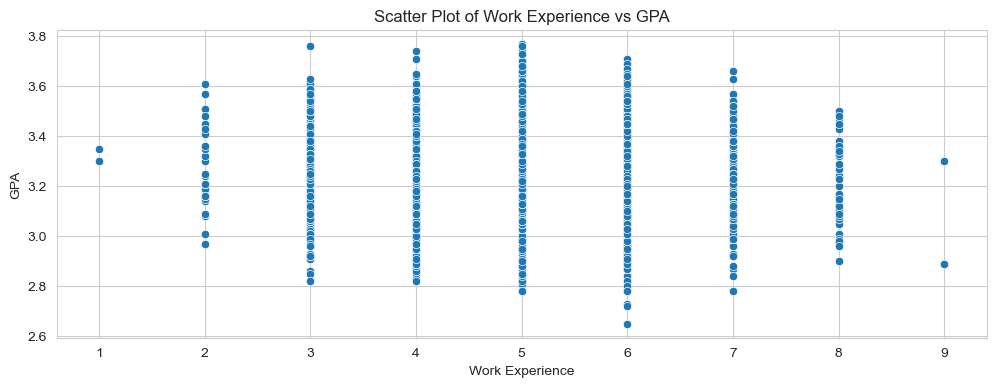

In [15]:
# Calculating the correlation coefficient
corr_coef = df['work_exp'].corr(df['gpa'])
print(corr_coef)

plt.figure(figsize=(12,4))
sns.scatterplot(x=df['work_exp'], y=df['gpa'])

plt.xlabel('Work Experience')

plt.ylabel('GPA')

plt.title('Scatter Plot of Work Experience vs GPA')

#### Pattern Analysis

In [16]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


##### 
- Top Working Industry

In [17]:
working_industry = df['work_industry'].value_counts()
working_industry

Consulting               1619
PE/VC                     907
Technology                716
Nonprofit/Gov             651
Investment Banking        580
Financial Services        451
Other                     421
Health Care               334
Investment Management     166
CPG                       114
Real Estate               111
Media/Entertainment        59
Retail                     33
Energy                     32
Name: work_industry, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Energy'),
  Text(1, 0, 'Retail'),
  Text(2, 0, 'Media/Entertainment'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'CPG')])

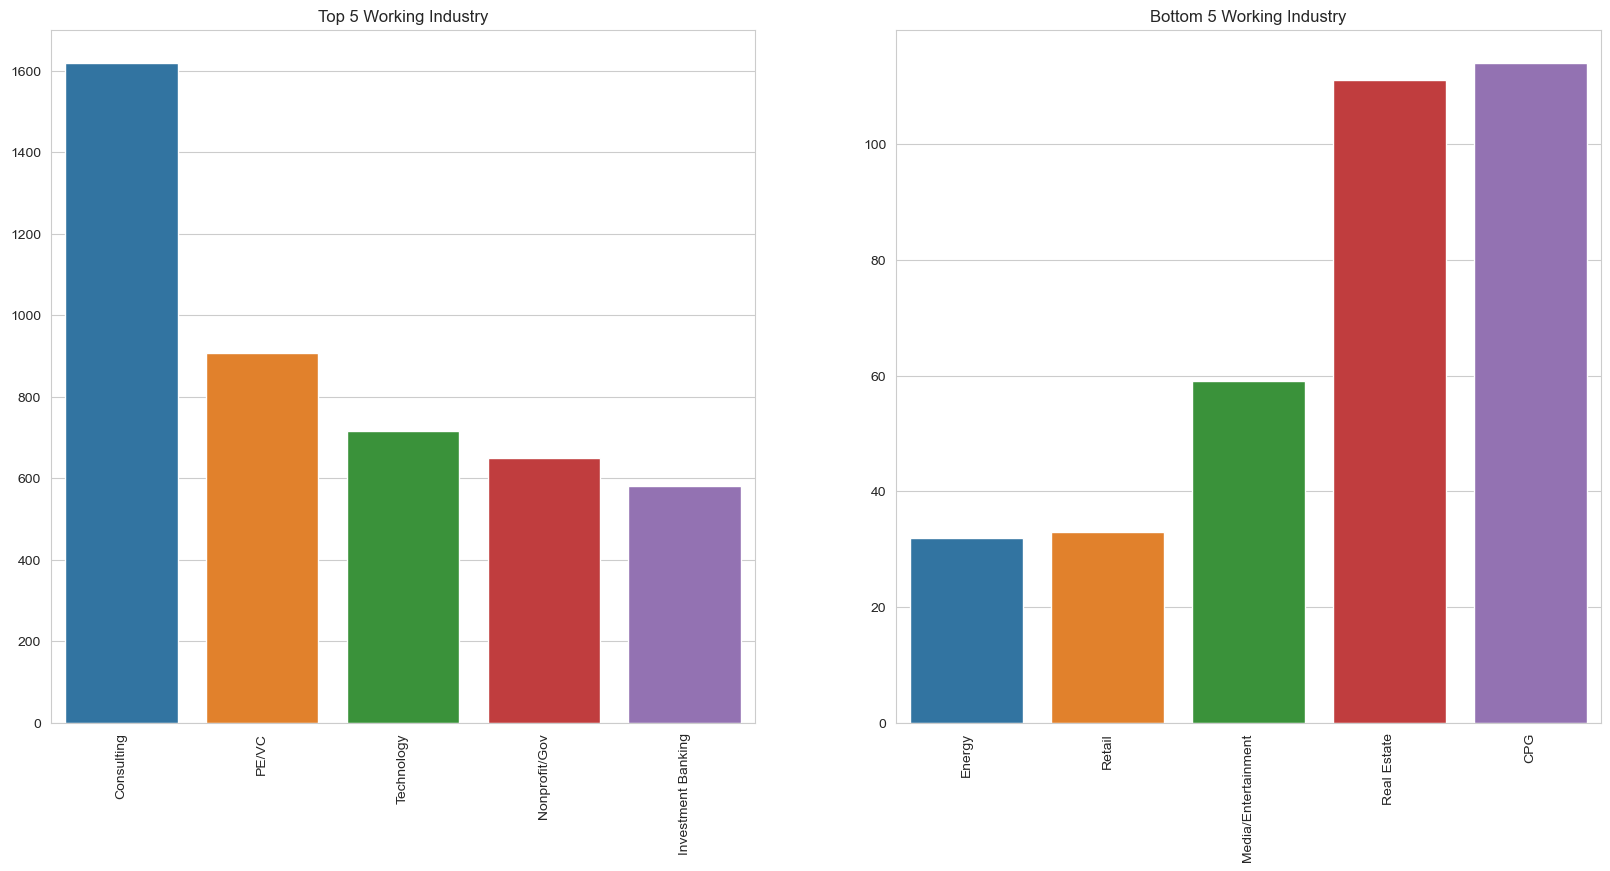

In [18]:
plt.figure(figsize=(20,9))
           
plt.subplot(1,2,1)
# Visualizing the top 5
sns.barplot(x=working_industry.nlargest(5).index, y=working_industry.nlargest(5).values)
plt.title('Top 5 Working Industry')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
# Visualizing the bottom 5
sns.barplot(x=working_industry.nsmallest(5).index, y=working_industry.nsmallest(5).values)
plt.title('Bottom 5 Working Industry')
plt.xticks(rotation=90)


### Step 4: Data Preprocessing

In [19]:
df.columns

Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp', 'work_industry', 'admission'],
      dtype='object')

In [20]:
X = df.drop(['application_id', 'admission'], axis=1)
y = df['admission']

In [21]:
columns_to_transform = ['gender', 'international', 'major', 'work_industry', 'race']
x_scaled = pd.get_dummies(X, columns=columns_to_transform, drop_first=True, prefix=columns_to_transform, dtype='int')
x_scaled

,gpa,gmat,work_exp,gender_Male,international_True,major_Humanities,major_STEM,work_industry_Consulting,work_industry_Energy,work_industry_Financial Services,...,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,race_Black,race_Hispanic,race_International,race_White
0,3.30,620.0,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.28,680.0,5.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.30,710.0,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3.47,690.0,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,3.35,590.0,5.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,5.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6190,3.18,670.0,4.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6191,3.22,680.0,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6192,3.36,590.0,5.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [22]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_scaled = le.fit_transform(y)
print(y_scaled)
print(le.classes_)

[0 1 0 ... 0 1 1]
['Admit' 'Deny' 'Waitlist']


#### 
- Data Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, random_state=100, test_size=0.2)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4955, 24)

(1239, 24)

(4955,)

(1239,)

####
- Model Build - Decision Tree 🌲🌲

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [25]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([1, 1, 1, ..., 1, 1, 1])

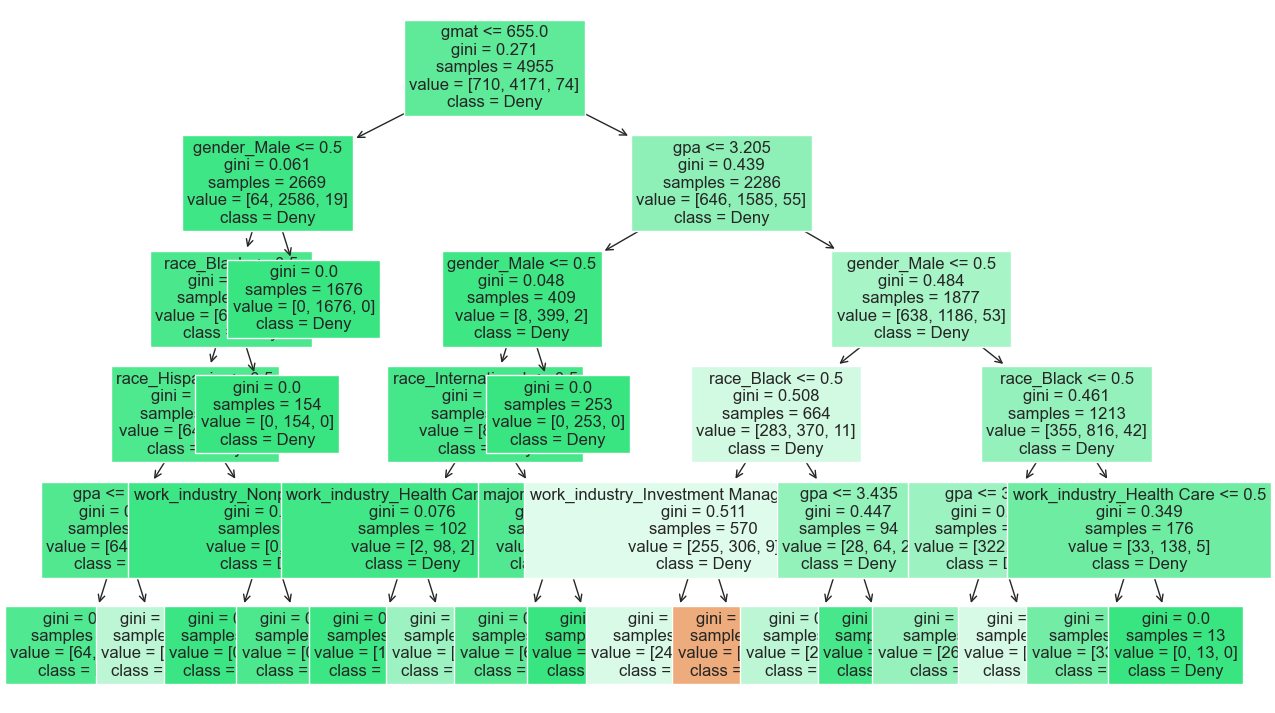

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,9))
tree = plot_tree(dtree, filled=True, feature_names=x_scaled.columns, class_names=le.classes_, fontsize=12)
plt.show()

### Step 6: Evaluation

Accuracy: 0.8256658595641646
------------------------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.83      1.00      0.90      1023
           2       0.00      0.00      0.00        26

    accuracy                           0.83      1239
   macro avg       0.28      0.33      0.30      1239
weighted avg       0.68      0.83      0.75      1239

------------------------------------------------------------------------------------------


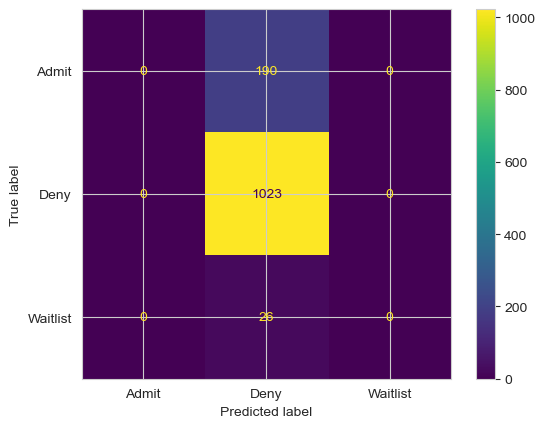

In [27]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
print('Accuracy:', accuracy_score(y_test, dtree_pred))
print('---'*30)
print('Classification Report:', classification_report(y_test, dtree_pred))
print('---'*30)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_pred), display_labels=le.classes_)
cm.plot()

### Step 6: Hyperparameter Tuning

In [32]:
tuned_dtree = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=7,
    random_state=200
)

In [33]:
tuned_dtree.fit(X_train, y_train)
tuned_dtree_pred = tuned_dtree.predict(X_test)
tuned_dtree_pred

array([1, 1, 1, ..., 1, 1, 1])

[Text(0.3602430555555556, 0.9375, 'gmat <= 655.0\ngini = 0.271\nsamples = 4955\nvalue = [710, 4171, 74]\nclass = Deny'),
 Text(0.16319444444444445, 0.8125, 'gender_Male <= 0.5\ngini = 0.061\nsamples = 2669\nvalue = [64, 2586, 19]\nclass = Deny'),
 Text(0.14930555555555555, 0.6875, 'race_Black <= 0.5\ngini = 0.156\nsamples = 993\nvalue = [64, 910, 19]\nclass = Deny'),
 Text(0.13541666666666666, 0.5625, 'race_Hispanic <= 0.5\ngini = 0.182\nsamples = 839\nvalue = [64, 756, 19]\nclass = Deny'),
 Text(0.0763888888888889, 0.4375, 'gmat <= 575.0\ngini = 0.198\nsamples = 744\nvalue = [64, 663, 17]\nclass = Deny'),
 Text(0.041666666666666664, 0.3125, 'work_industry_Other <= 0.5\ngini = 0.068\nsamples = 85\nvalue = [3, 82, 0]\nclass = Deny'),
 Text(0.027777777777777776, 0.1875, 'major_Humanities <= 0.5\ngini = 0.05\nsamples = 78\nvalue = [2, 76, 0]\nclass = Deny'),
 Text(0.013888888888888888, 0.0625, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]\nclass = Deny'),
 Text(0.041666666666666664, 0.062

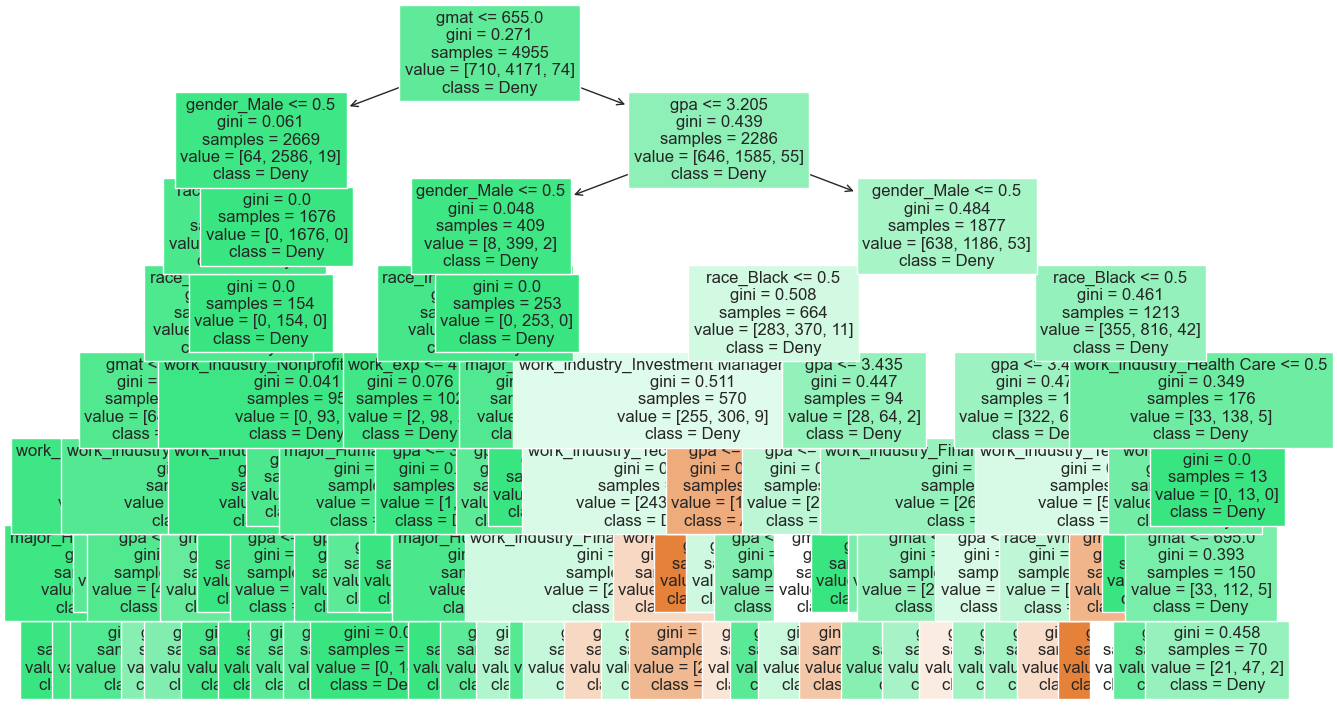

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,9))
plot_tree(tuned_dtree, feature_names=x_scaled.columns, class_names=le.classes_, filled=True, fontsize=12)

Accuracy Score: 0.8232445520581114
------------------------------------------------------------------------------------------
Classification Report:/n               precision    recall  f1-score   support

           0       0.45      0.11      0.18       190
           1       0.84      0.98      0.90      1023
           2       0.00      0.00      0.00        26

    accuracy                           0.82      1239
   macro avg       0.43      0.36      0.36      1239
weighted avg       0.76      0.82      0.77      1239



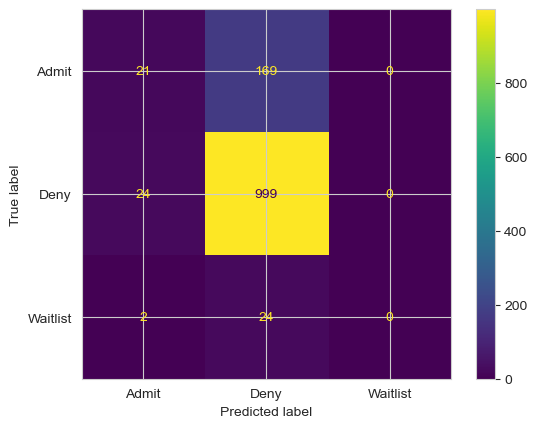

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
print('Accuracy Score:', accuracy_score(y_test, tuned_dtree_pred))
print('---'*30)
print('Classification Report:/n', classification_report(y_test, tuned_dtree_pred))

cm = confusion_matrix(y_test, tuned_dtree_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

### Step 7: SMOTE Balancing

In [39]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
display(X_train_res.shape, y_train_res.shape)

(12513, 24)

(12513,)

In [41]:
res_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)
res_tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [43]:
# Smote Predictions
res_pred = res_tree.predict(X_test)
res_pred

array([1, 0, 1, ..., 1, 1, 1])

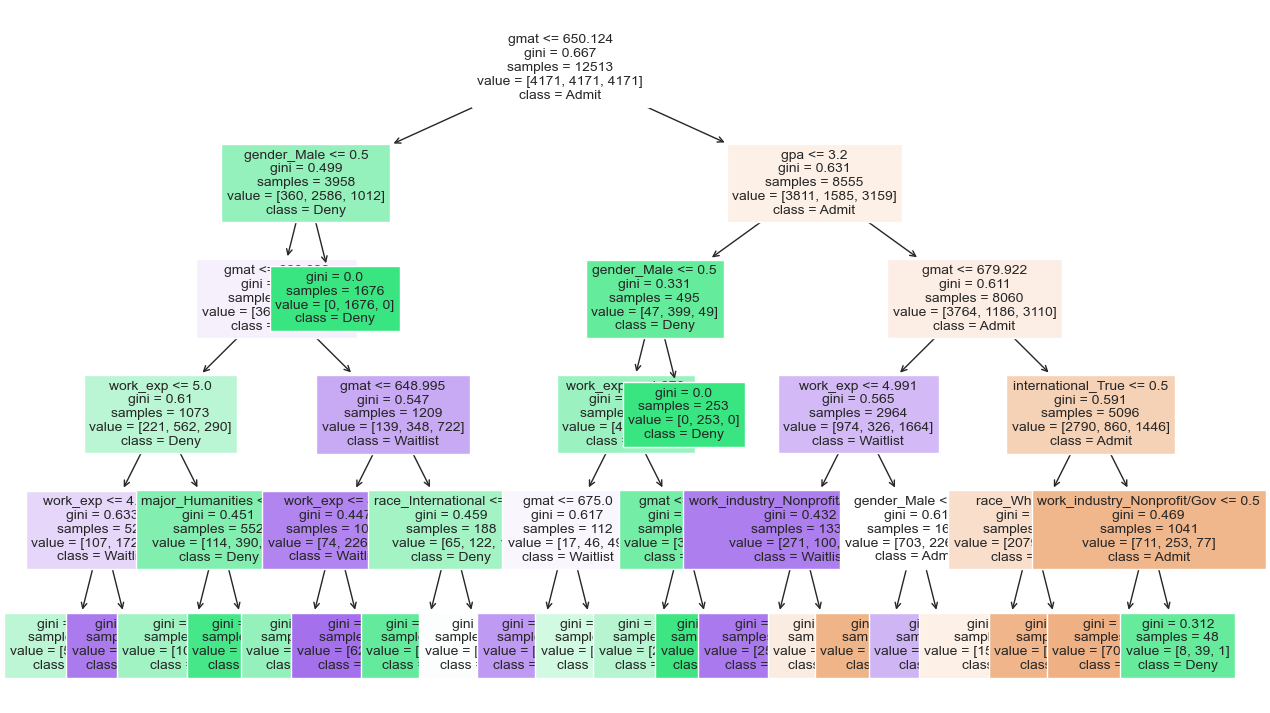

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,9))
resplot_plot = plot_tree(res_tree, filled=True, feature_names=x_scaled.columns, class_names=le.classes_, fontsize=10)
plt.show()

####
- SMOTE Evaluation

Accuracy Score: 0.6747376916868443
------------------------------------------------------------------------------------------
Classification Report:/n               precision    recall  f1-score   support

           0       0.39      0.73      0.50       190
           1       0.96      0.68      0.79      1023
           2       0.04      0.23      0.06        26

    accuracy                           0.67      1239
   macro avg       0.46      0.55      0.45      1239
weighted avg       0.86      0.67      0.73      1239



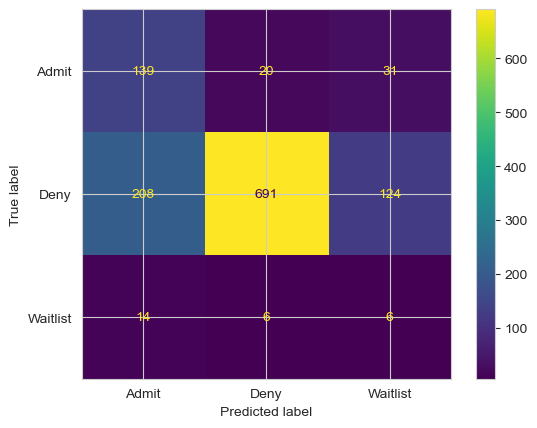

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
print('Accuracy Score:', accuracy_score(y_test, res_pred))
print('---'*30)
print('Classification Report:/n', classification_report(y_test, res_pred))

cm = confusion_matrix(y_test, res_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()